In [58]:
# import pandas as pd

# # --- Load ---
# df_case   = pd.read_csv('../data/dengue_case.csv')
# df_weather= pd.read_csv("../data/combined_weather_daily_all.csv")
# df_mos    = pd.read_csv("../data/MosIndex_model_timeseries.csv")
# df_rain   = pd.read_csv("../data/combined_rain_daily_all.csv")

# # --- Standardize names ---
# df_weather = df_weather.rename(columns={
#     'date':'Date','city':'City',
#     'pressure':'Pressure','Tmean':'Tmean','Tmin':'Tmin','Tmax':'Tmax',
#     'humidity':'Humidity','windspeed':'Windspeed'
# })
# df_rain = df_rain.rename(columns={'date':'Date','city':'City','precip':'Precip'})
# df_mos  = df_mos.rename(columns={'County':'City'})

# # --- Clean keys: datetime & city strings ---
# for d in (df_case, df_weather, df_rain, df_mos):
#     if 'Date' in d.columns:
#         d['Date'] = pd.to_datetime(d['Date'], errors='coerce').dt.normalize()
#     if 'City' in d.columns:
#         d['City'] = d['City'].astype(str).str.strip()

# # ---------- CITY–DAY REFERENCE TABLES ----------
# # Weather: average across stations per City–Date
# w_agg = (df_weather.groupby(['Date','City'], as_index=False)
#          .agg(Pressure=('Pressure','mean'),
#               Tmean=('Tmean','mean'),
#               Tmin=('Tmin','mean'),
#               Tmax=('Tmax','mean'),
#               Humidity=('Humidity','mean'),
#               Windspeed=('Windspeed','mean')))

# # Rain: choose your daily rule. If source is already daily, use mean/first.
# r_agg = (df_rain.groupby(['Date','City'], as_index=False)
#          .agg(Precip=('Precip','mean')))

# # Cases → City–Date counts (if no 'Cases' column, treat each row as 1)
# if 'Cases' not in df_case.columns:
#     df_case['Cases'] = 1
# cases_cityday = (df_case.groupby(['Date','City'], as_index=False)
#                  .agg(Cases=('Cases','sum')))

# # Mosquito indices → City–Date
# mos_cols = [c for c in ['BI','HI','CI','PI','AI','AIAeg','AIAlb'] if c in df_mos.columns]
# mos_cityday = (df_mos.groupby(['Date','City'], as_index=False)[mos_cols].mean()
#                if mos_cols else df_mos[['Date','City']].drop_duplicates())

# # ---------- CASE-LEVEL ENRICHED (for ArcGIS points) ----------
# case_enriched = (df_case
#     .merge(w_agg, on=['Date','City'], how='left', validate='many_to_one')
#     .merge(r_agg, on=['Date','City'], how='left', validate='many_to_one'))

# keep_cols = [
#     'Date','City',
#     'Cases','Pressure','Tmean','Tmin','Tmax','Humidity','Windspeed','Precip'
# ]
# keep_cols = [c for c in keep_cols if c in case_enriched.columns]
# case_enriched[keep_cols].to_csv('../data/1_dengue_cases_with_weather_rain.csv',
#                                 index=False, date_format='%Y-%m-%d')

# # ---------- CITY–DAY ML TABLE ----------
# df_ml_cityday = (cases_cityday
#     .merge(w_agg, on=['Date','City'], how='left', validate='one_to_one')
#     .merge(r_agg, on=['Date','City'], how='left', validate='one_to_one')
#     .merge(mos_cityday, on=['Date','City'], how='left', validate='one_to_one'))

# df_out = (df_ml_cityday[df_ml_cityday['Date'] >= pd.Timestamp('2010-01-01')]
#           .sort_values(['Date','City']))

# df_out.to_csv('../data/2_df_ml.csv', index=False, date_format='%Y-%m-%d')
# print(f"Saved {len(case_enriched):,} rows to dengue_cases_with_weather_rain.csv")
# print(f"Saved {len(df_out):,} rows to df_ml.csv")


In [59]:
import pandas as pd

# --- Load ---
df_case   = pd.read_csv('../data/dengue_case.csv')
df_weather= pd.read_csv("../data/combined_weather_daily_all.csv")
df_mos    = pd.read_csv("../data/MosIndex_model_timeseries.csv")
df_rain   = pd.read_csv("../data/combined_rain_daily_all.csv")

# --- Standardize names ---
df_weather = df_weather.rename(columns={
    'date':'Date','city':'City',
    'pressure':'Pressure','Tmean':'Tmean','Tmin':'Tmin','Tmax':'Tmax',
    'humidity':'Humidity','windspeed':'Windspeed'
})
df_rain = df_rain.rename(columns={'date':'Date','city':'City','precip':'Precip'})
df_mos  = df_mos.rename(columns={'County':'City'})

# --- Clean keys: datetime & city strings ---
for d in (df_case, df_weather, df_rain, df_mos):
    if 'Date' in d.columns:
        d['Date'] = pd.to_datetime(d['Date'], errors='coerce').dt.normalize()
    if 'City' in d.columns:
        d['City'] = d['City'].astype(str).str.strip()

# ---------- CITY–DAY REFERENCE TABLES ----------
# Weather: average across stations per City–Date
w_agg = (df_weather.groupby(['Date','City'], as_index=False)
         .agg(Pressure=('Pressure','mean'),
              Tmean=('Tmean','mean'),
              Tmin=('Tmin','mean'),
              Tmax=('Tmax','mean'),
              Humidity=('Humidity','mean'),
              Windspeed=('Windspeed','mean')))

# Rain: choose your daily rule. If source is already daily, use mean/first.
r_agg = (df_rain.groupby(['Date','City'], as_index=False)
         .agg(Precip=('Precip','mean')))

# Cases → City–Date counts (if no 'Cases' column, treat each row as 1)
if 'Cases' not in df_case.columns:
    df_case['Cases'] = 1
cases_cityday = (df_case.groupby(['Date','City'], as_index=False)
                 .agg(Cases=('Cases','sum')))

# Mosquito indices → City–Date
mos_cols = [c for c in ['BI','HI','CI','PI','AI','AIAeg','AIAlb'] if c in df_mos.columns]
mos_cityday = (df_mos.groupby(['Date','City'], as_index=False)[mos_cols].mean()
               if mos_cols else df_mos[['Date','City']].drop_duplicates())

# ---------- CASE-LEVEL ENRICHED (for ArcGIS points) ----------
case_enriched = (df_case
    .merge(w_agg, on=['Date','City'], how='left', validate='many_to_one')
    .merge(r_agg, on=['Date','City'], how='left', validate='many_to_one'))

keep_cols = [
    'Date','City',
    'Cases','Pressure','Tmean','Tmin','Tmax','Humidity','Windspeed','Precip'
]
keep_cols = [c for c in keep_cols if c in case_enriched.columns]
case_enriched[keep_cols].to_csv('../data/1_dengue_cases_with_weather_rain.csv',
                                index=False, date_format='%Y-%m-%d')

# ---------- CITY–DAY ML TABLE ----------
df_ml_cityday = (cases_cityday
    .merge(w_agg, on=['Date','City'], how='left', validate='one_to_one')
    .merge(r_agg, on=['Date','City'], how='left', validate='one_to_one')
    .merge(mos_cityday, on=['Date','City'], how='left', validate='one_to_one'))

# df_out = (df_ml_cityday[df_ml_cityday['Date'] >= pd.Timestamp('2010-01-01')]
#           .sort_values(['Date','City']))

df_out = df_ml_cityday.sort_values(['Date','City'])

df_out.to_csv('../data/2_df_ml.csv', index=False, date_format='%Y-%m-%d')
print(f"Saved {len(case_enriched):,} rows to dengue_cases_with_weather_rain.csv")
print(f"Saved {len(df_out):,} rows to df_ml.csv")


Saved 106,987 rows to dengue_cases_with_weather_rain.csv
Saved 10,713 rows to df_ml.csv


In [60]:
df_out.head()

,Date,City,Cases,Pressure,Tmean,Tmin,Tmax,Humidity,Windspeed,Precip,BI,HI,CI,PI,AI,AIAeg,AIAlb
0,1998-01-02,Pingtung County,1,1015.17,23.57,21.9,26.2,72.39,3.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-03,Pingtung County,1,1015.63,23.62,20.8,27.2,74.91,1.12,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-01-13,Yilan County,1,1013.73,19.81,15.6,24.8,77.98,1.95,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-01-15,Kaohsiung City,1,1008.14,19.63,17.3,24.6,79.57,4.00,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-01-20,Yilan County,1,1021.38,14.42,11.3,16.9,89.24,1.87,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Dengue Cases'}, xlabel='Date'>

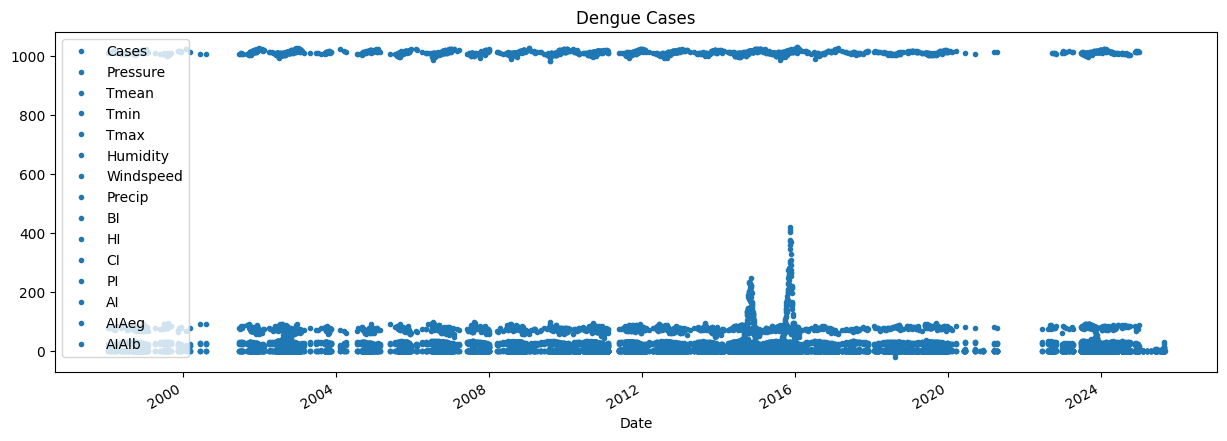

In [61]:
import matplotlib.pyplot as plt
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


df_out["Date"] = pd.to_datetime(df_out["Date"])
df_out.set_index("Date", inplace=True)
df_out[df_out['City'] == 'Kaohsiung City'].plot(style='.', figsize=(15,5), color = color_pal[0], title= "Dengue Cases")

## Creating a boxplot grid for numeric features

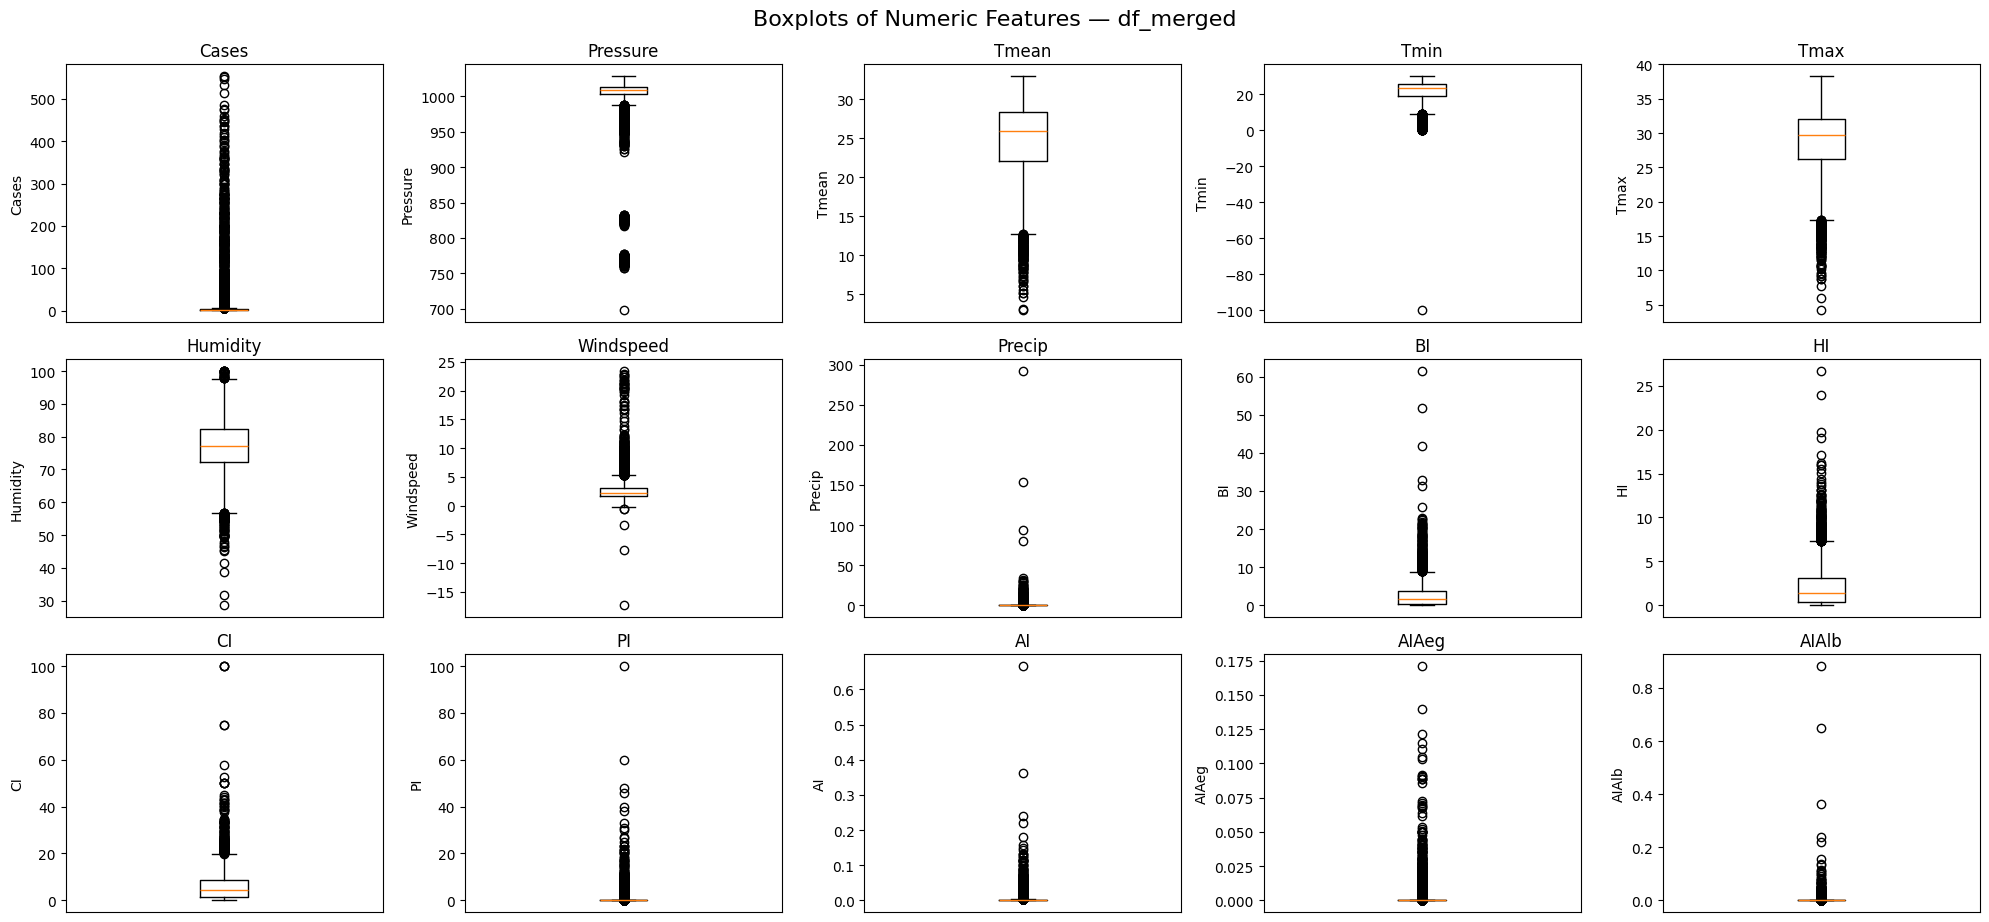

In [62]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplot_grid(
    df,
    numeric_cols=None,
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title='Boxplots of Numeric Features',
    sample_n=None,         # e.g., 200_000 to speed up on very large data
    showfliers=True,       # show outliers
    vert=True              # vertical boxplots
):
    """
    Plot a grid of boxplots for numeric columns in a DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    numeric_cols : list[str] | None
        Columns to plot. If None, all numeric columns are used.
    cols_per_row : int
        Number of plots per row.
    figsize_per_plot : tuple
        Size per subplot (width, height).
    title : str
        Suptitle for the figure.
    sample_n : int | None
        If set, randomly sample this many rows to speed up plotting.
    showfliers : bool
        Whether to display outliers.
    vert : bool
        Vertical (True) or horizontal (False) boxplots.
    """

    # Optional sampling to speed up plotting on huge dataframes
    data = df if sample_n is None or len(df) <= (sample_n or 0) else df.sample(sample_n, random_state=42)

    # Determine numeric columns if not provided
    if numeric_cols is None:
        numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

    if len(numeric_cols) == 0:
        raise ValueError("No numeric columns found to plot.")

    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / cols_per_row)

    # Create subplots
    fig, axes = plt.subplots(
        n_rows, cols_per_row,
        figsize=(cols_per_row * figsize_per_plot[0], n_rows * figsize_per_plot[1])
    )

    # Ensure axes is a 1-D array
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = np.array([axes])

    # Plot each numeric column
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        series = data[col].dropna().values
        if series.size == 0:
            ax.set_title(f"{col} (no data)")
            ax.axis('off')
            continue

        ax.boxplot(series, vert=vert, showfliers=showfliers)
        ax.set_title(col)
        if vert:
            ax.set_xticks([])
            ax.set_xlabel("")
            ax.set_ylabel(col)
        else:
            ax.set_yticks([])
            ax.set_ylabel("")
            ax.set_xlabel(col)

    # Hide any leftover axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Layout & title
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()
    return fig, axes

# 👉 Run it on your dataset
_ = plot_boxplot_grid(
    df_out,
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title="Boxplots of Numeric Features — df_merged",
    sample_n=200_000,      # optional: remove or adjust
    showfliers=True,
    vert=True
)


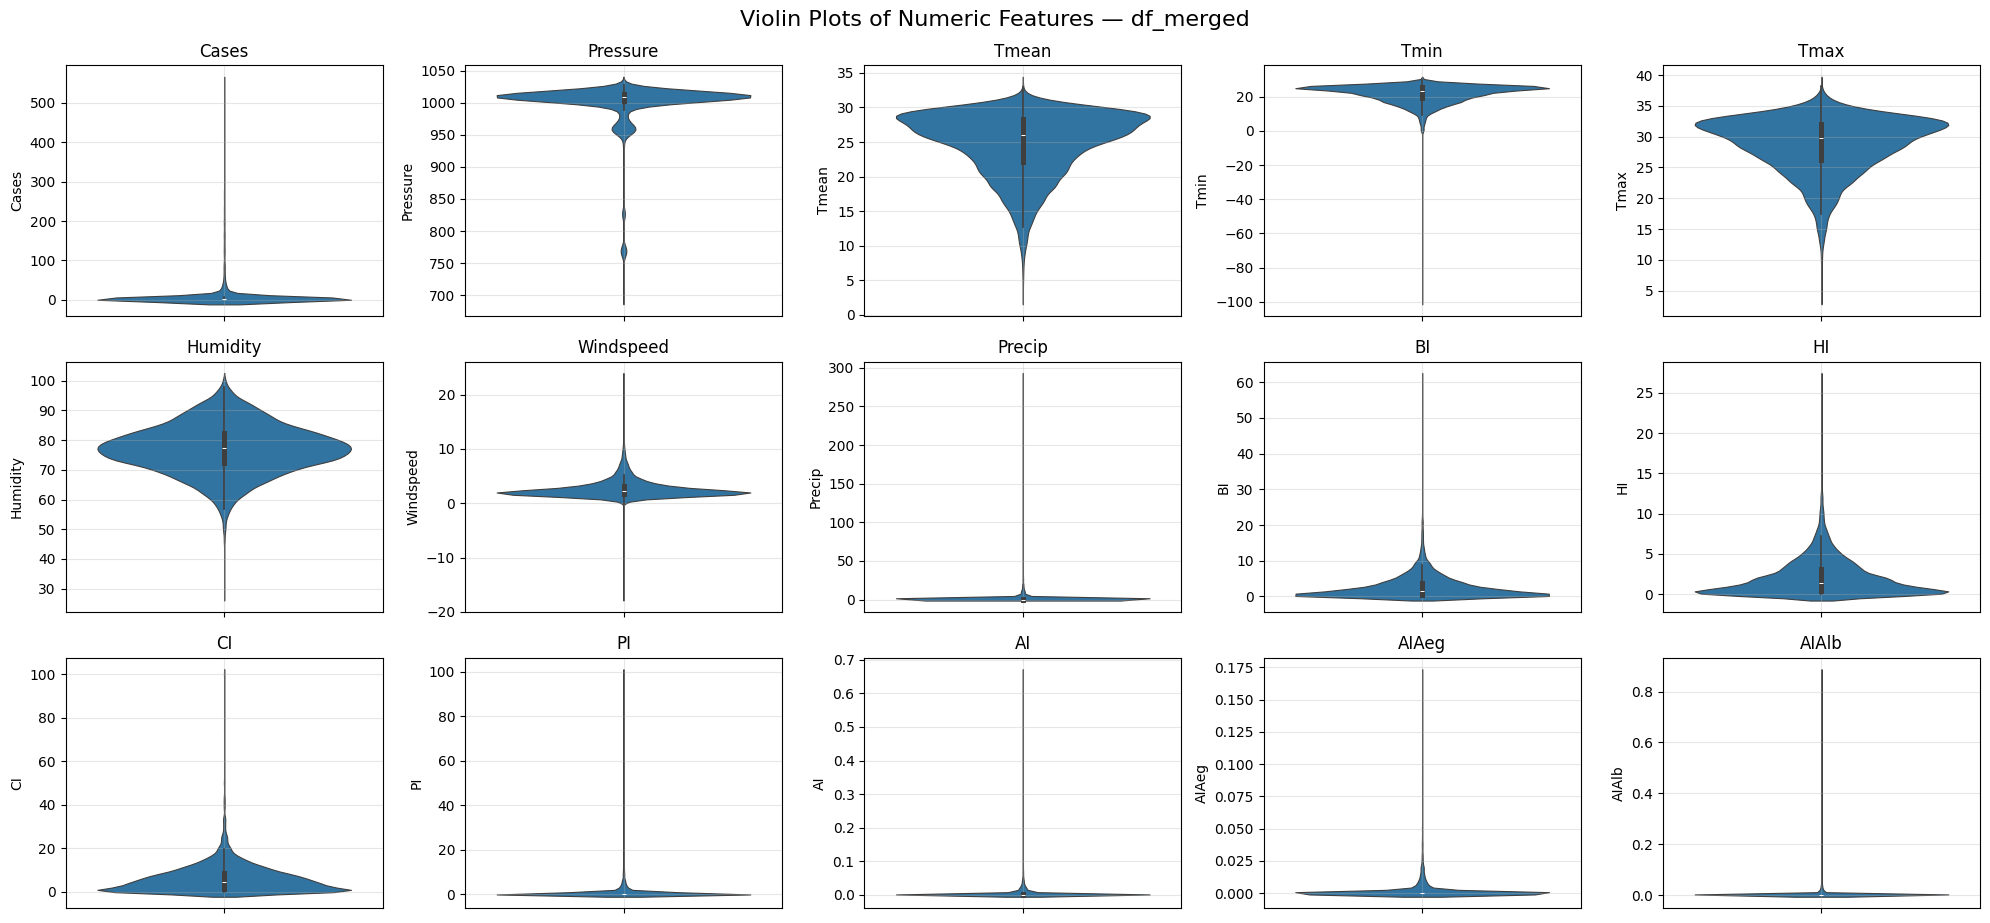

In [63]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin_grid(
    df,
    numeric_cols=None,
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title='Violin Plots of Numeric Features',
    sample_n=None,
    vert=True,
    inner='box'   # options: 'box', 'quart', 'point', or None
):
    """
    Plot a grid of violin plots for numeric columns in a DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    numeric_cols : list[str] | None
        Columns to plot. If None, all numeric columns are used.
    cols_per_row : int
        Number of plots per row.
    figsize_per_plot : tuple
        Size (width, height) per subplot.
    title : str
        Suptitle for the figure.
    sample_n : int | None
        Randomly sample rows to speed up plotting (for large data).
    vert : bool
        Vertical (True) or horizontal (False) violins.
    inner : str
        Display inside the violin — 'box', 'quart', 'point', or None.
    """

    # Optional sampling
    data = df if sample_n is None or len(df) <= (sample_n or 0) else df.sample(sample_n, random_state=42)

    # Identify numeric columns
    if numeric_cols is None:
        numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

    if len(numeric_cols) == 0:
        raise ValueError("No numeric columns found to plot.")

    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / cols_per_row)

    # Create subplot grid
    fig, axes = plt.subplots(
        n_rows, cols_per_row,
        figsize=(cols_per_row * figsize_per_plot[0], n_rows * figsize_per_plot[1])
    )

    axes = axes.flatten()

    # Plot each numeric column
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.violinplot(y=data[col] if vert else None,
                       x=None if vert else data[col],
                       ax=ax, inner=inner, linewidth=0.8)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel(col if vert else "")
        ax.grid(True, alpha=0.3)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()
    return fig, axes


# 🎯 Example usage for your dataset
_ = plot_violin_grid(
    df_out.reset_index(drop=True),  # 👈 add this
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title="Violin Plots of Numeric Features — df_merged",
    sample_n=200_000,
    vert=True,
    inner='box'
)


In [64]:
import numpy as np

# Make a copy to preserve the original
df_cleaned = df_out.copy()

# ---- WEATHER FEATURES ----
# Pressure: realistic sea-level range
df_cleaned.loc[(df_cleaned['Pressure'] < 900) | (df_cleaned['Pressure'] > 1050), 'Pressure'] = np.nan

# Temperature (°C)
df_cleaned.loc[(df_cleaned['Tmean'] < 0) | (df_cleaned['Tmean'] > 40), 'Tmean'] = np.nan
df_cleaned.loc[(df_cleaned['Tmin'] < -5) | (df_cleaned['Tmin'] > 40), 'Tmin'] = np.nan
df_cleaned.loc[(df_cleaned['Tmax'] < 0) | (df_cleaned['Tmax'] > 45), 'Tmax'] = np.nan

# Humidity (%)
df_cleaned.loc[(df_cleaned['Humidity'] < 20) | (df_cleaned['Humidity'] > 100), 'Humidity'] = np.nan

# Windspeed (m/s)
df_cleaned.loc[(df_cleaned['Windspeed'] < 0) | (df_cleaned['Windspeed'] > 60), 'Windspeed'] = np.nan

# Precipitation (mm/day)
df_cleaned.loc[(df_cleaned['Precip'] < 0) | (df_cleaned['Precip'] > 800), 'Precip'] = np.nan


# ---- MOSQUITO INDICES ----
# BI, HI, CI, PI (should not exceed 100)
for col in ['BI', 'HI', 'CI', 'PI']:
    df_cleaned.loc[(df_cleaned[col] < 0) | (df_cleaned[col] > 100), col] = np.nan

# AI, AIAeg, AIAlb (typically 0–1 or 0–1.5)
for col in ['AI', 'AIAeg', 'AIAlb']:
    df_cleaned.loc[(df_cleaned[col] < 0) | (df_cleaned[col] > 1.5), col] = np.nan


# ---- LOGIC CHECKS ----
# Ensure Tmin ≤ Tmean ≤ Tmax
mask_temp_invalid = (df_cleaned['Tmin'] > df_cleaned['Tmean']) | (df_cleaned['Tmean'] > df_cleaned['Tmax'])
df_cleaned.loc[mask_temp_invalid, ['Tmin', 'Tmean', 'Tmax']] = np.nan


# ---- REPORT ----
n_removed = (df_cleaned.isna().sum() - df_cleaned.isna().sum())
print("✅ Cleaned unrealistic values in df_merged.")
print("Columns with invalid values replaced by NaN:")
print(df_cleaned.isna().sum() - df_out.isna().sum())

# ---- OPTIONAL: Save cleaned version ----

df_out = df_out.reset_index()  # brings back Date and City

df_cleaned.to_csv("../data/3_df_merged_cleaned.csv", index=False)
print(f"💾 Saved cleaned dataset with shape: {df_cleaned.shape}")


✅ Cleaned unrealistic values in df_merged.
Columns with invalid values replaced by NaN:
City           0
Cases          0
Pressure     241
Tmean          1
Tmin           2
Tmax           1
Humidity       0
Windspeed      6
Precip         0
BI             0
HI             0
CI             0
PI             0
AI             0
AIAeg          0
AIAlb          0
dtype: int64
💾 Saved cleaned dataset with shape: (10713, 16)


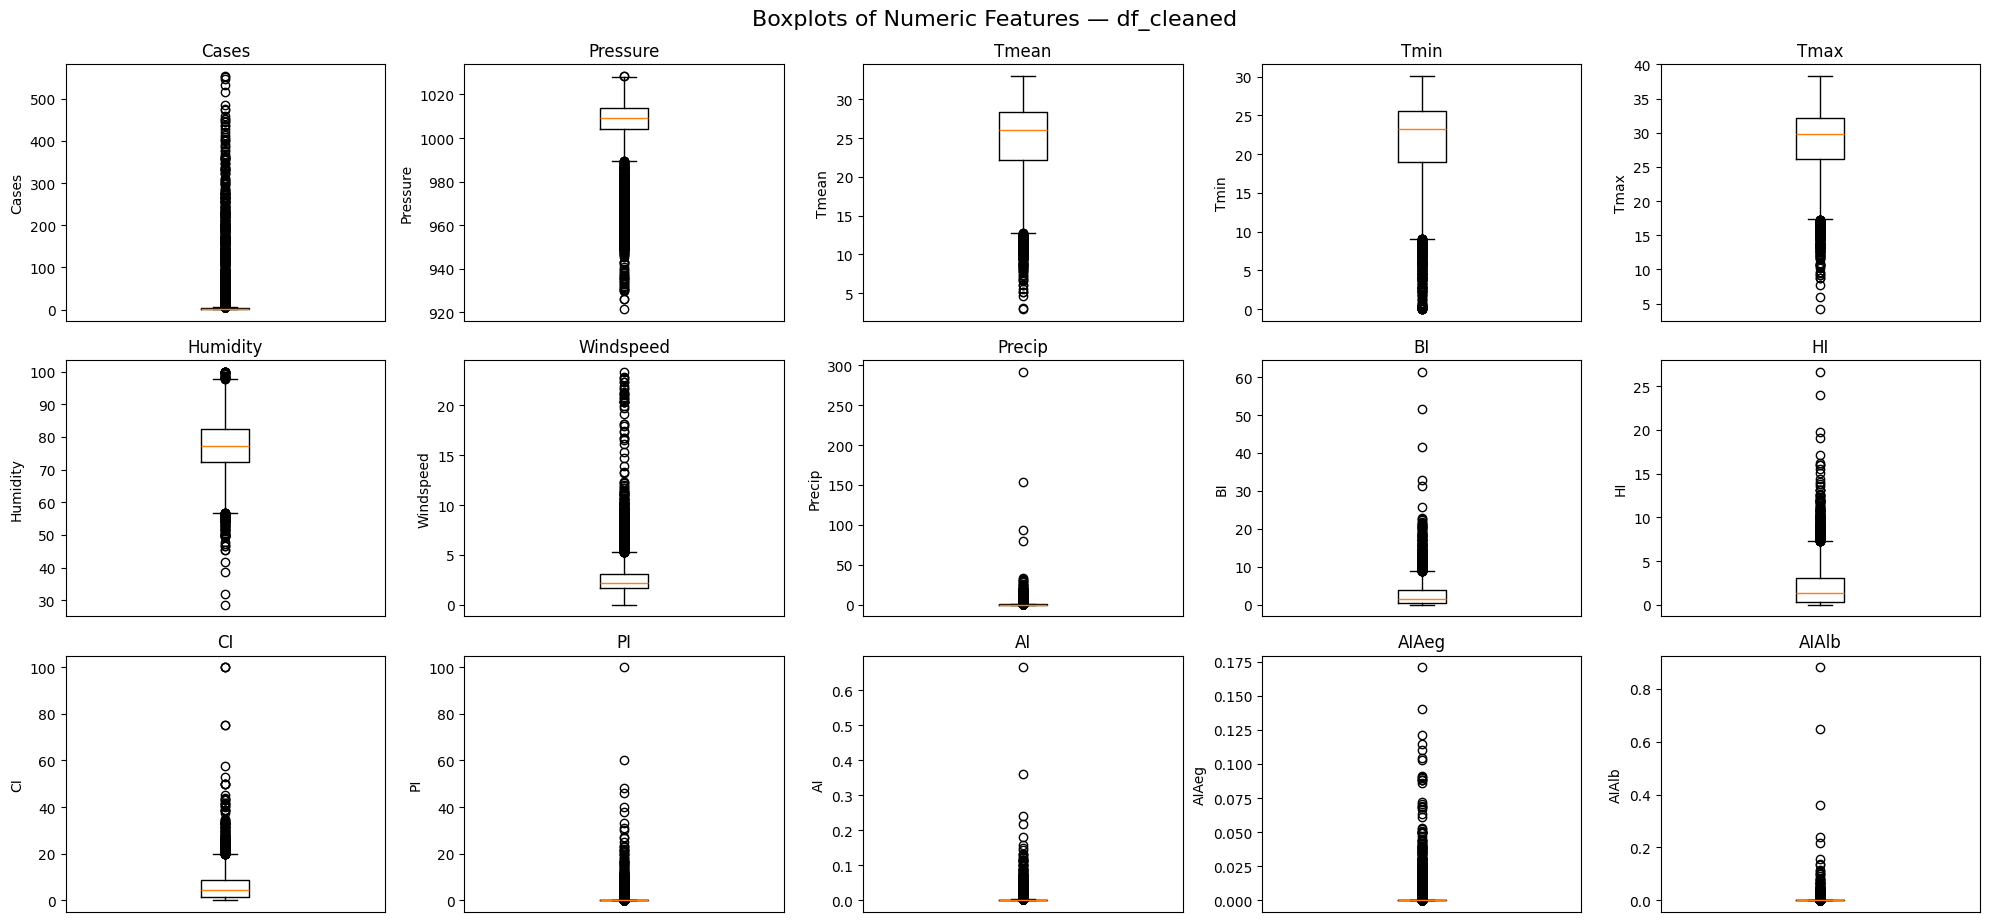

In [65]:
_ = plot_boxplot_grid(
    df_cleaned,
    cols_per_row=5,
    figsize_per_plot=(4, 3),
    title="Boxplots of Numeric Features — df_cleaned",
    showfliers=True,
    vert=True
)

## Metadata Report

In [66]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_string_dtype
from pandas import CategoricalDtype

def _safe_nunique(col):
    s = col.dropna()
    try:
        return pd.unique(s).size
    except TypeError:
        # Fallback for unhashable values like lists/dicts
        return pd.unique(s.astype(str)).size

def _safe_examples(col, k=5):
    s = col.dropna()
    if s.empty:
        return []
    try:
        vals = pd.unique(s)
    except TypeError:
        vals = pd.unique(s.astype(str))
    # Normalize a few examples to printable values
    out = []
    for v in vals[:k]:
        # datetimes → ISO strings
        if isinstance(v, pd.Timestamp):
            out.append(v.isoformat())
            continue
        # hashable primitives: keep as-is
        try:
            hash(v)
            out.append(v)
        except TypeError:
            out.append(repr(v))  # lists/dicts/sets → repr
    return out

def create_metadata(df: pd.DataFrame) -> pd.DataFrame:
    meta = pd.DataFrame(index=df.columns)
    meta['dtype']        = df.dtypes
    meta['n_unique']     = [ _safe_nunique(df[c]) for c in df.columns ]
    meta['missing_sum']  = df.isnull().sum()
    meta['is_numeric']   = df.dtypes.apply(is_numeric_dtype)
    meta['is_categorical'] = df.dtypes.apply(
        lambda dt: isinstance(dt, CategoricalDtype) or is_object_dtype(dt) or is_string_dtype(dt)
    )
    meta['sample_values'] = [ _safe_examples(df[c], k=5) for c in df.columns ]
    return meta

# 🧠 Generate metadata for your dataset
meta_df = create_metadata(df_cleaned)


meta_df.to_csv("../data/4_metadata_report.csv", index=True)
print("✅ Metadata report saved as 'metadata_report.csv'")
meta_df.head()


✅ Metadata report saved as 'metadata_report.csv'


,dtype,n_unique,missing_sum,is_numeric,is_categorical,sample_values
City,object,22,0,False,True,"[Pingtung County, Yilan County, Kaohsiung City..."
Cases,int64,280,0,True,False,"[1, 2, 3, 4, 5]"
Pressure,float64,3274,1628,True,False,"[1015.17, 1015.63, 1013.73, 1008.14, 1021.38]"
Tmean,float64,1867,1038,True,False,"[23.57, 23.62, 19.81, 19.63, 14.42]"
Tmin,float64,1082,1039,True,False,"[21.9, 20.8, 15.6, 17.3, 11.3]"


In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10713 entries, 1998-01-02 to 2025-09-02
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       10713 non-null  object 
 1   Cases      10713 non-null  int64  
 2   Pressure   9085 non-null   float64
 3   Tmean      9675 non-null   float64
 4   Tmin       9674 non-null   float64
 5   Tmax       9636 non-null   float64
 6   Humidity   9472 non-null   float64
 7   Windspeed  9725 non-null   float64
 8   Precip     9706 non-null   float64
 9   BI         6101 non-null   float64
 10  HI         6101 non-null   float64
 11  CI         6087 non-null   float64
 12  PI         4466 non-null   float64
 13  AI         6101 non-null   float64
 14  AIAeg      6101 non-null   float64
 15  AIAlb      6101 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.4+ MB
